In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from tardis import run_tardis
from tardis.io.atom_data.util import download_atom_data

In [3]:
download_atom_data('kurucz_cd23_chianti_H_He')

[tardis.io.atom_data.atom_web_download][INFO   ]  Downloading atomic data from https://media.githubusercontent.com/media/tardis-sn/tardis-refdata/master/atom_data/kurucz_cd23_chianti_H_He.h5 to /home/dhruvs/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (atom_web_download.py:49)


In [4]:
sim = run_tardis('tardis_challenge.yml')

[tardis.model.base   ][WARNING]  Abundances have not been normalized to 1. - normalizing (base.py:601)
[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:87)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /home/dhruvs/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:35)
[py.warnings         ][WARNING]  /home/dhruvs/anaconda3/envs/tardis-2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3427: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
 (warnings.py:110)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:172)
[tardis.io.atom_data.base][INFO   ]  Non provided atomic data: synpp_refs, photoionization_data (base.py:178)
[tardis.simulation.base][INFO   

[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      25810.876867  17828.568709  2.648457  0.384060
	5       8506.307495   7801.202437  7.726428  0.331357

 (base.py:436)
[tardis.simulation.base][INFO   ]  t_inner 16681.227 K -- next t_inner 40951.747 K (base.py:439)
[tardis.simulation.base][INFO   ]  Starting iteration 8/20 (base.py:326)
[py.warnings         ][WARNING]  /home/dhruvs/anaconda3/envs/tardis-2/lib/python3.7/site-packages/astropy/units/equivalencies.py:124: RuntimeWarning: divide by zero encountered in double_scalars
  (si.m, si.Hz, lambda x: _si.c.value / x),
 (warnings.py:110)
Running post-merge numba montecarlo (with C close lines)!
[tardis.simulation.base][INFO   ]  Luminosity emitted = 7.06237e+43 erg / s Luminosity absorbed = 5.14875e+44 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:450)
[tardis.simulation.base][INFO   ]  Plasma str

Running post-merge numba montecarlo (with C close lines)!
[tardis.simulation.base][INFO   ]  Luminosity emitted = 5.05800e+41 erg / s Luminosity absorbed = 4.99683e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:450)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      28965.535672  14792.561671  5.446910  0.284971
	5      11235.573677   9285.979048  8.186354  0.063409

 (base.py:436)
[tardis.simulation.base][INFO   ]  t_inner 12771.895 K -- next t_inner 58448.127 K (base.py:439)
[tardis.simulation.base][INFO   ]  Starting iteration 16/20 (base.py:326)
[py.warnings         ][WARNING]  /home/dhruvs/anaconda3/envs/tardis-2/lib/python3.7/site-packages/astropy/units/equivalencies.py:124: RuntimeWarning: divide by zero encountered in double_scalars
  (si.m, si.Hz, lambda x: _si.c.value / x),
 (warnings.py:110)
Running post-merge numba montecarlo (with C 

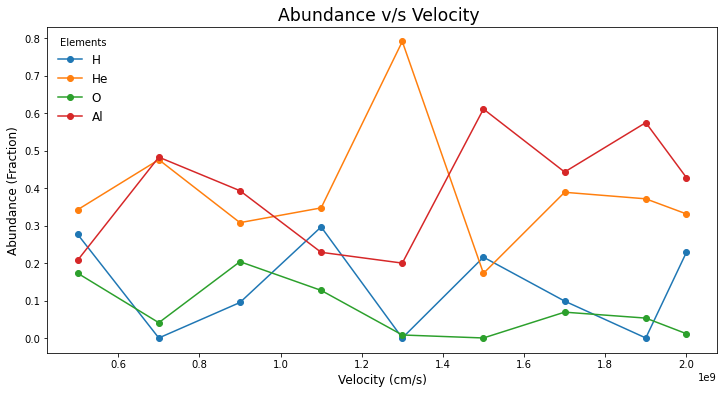

In [5]:
velocity = sim.model.velocity      # setting velocity as list
abundance = sim.model.abundance    # setting the obtained abundance
mod_velocity = velocity[:9] 

plt_df = pd.DataFrame(abundance.T)
plt_df['velocity'] = mod_velocity  # adding velocity to the dataframe

elements = {1:'H', 2:'He', 8:'O', 13:'Al'}  # Dictionary of elements 

plt.figure(figsize=(12, 6))
for atomic_number in plt_df.columns[:4]:
    plt.plot(plt_df['velocity'], plt_df[atomic_number], marker = 'o' ,label = elements[atomic_number])

plt.xlabel('Velocity (cm/s)', size='large')
plt.ylabel('Abundance (Fraction)', size='large')
plt.title('Abundance v/s Velocity ', size='xx-large')
plt.legend(title='Elements', loc='upper left', frameon=False, fontsize='large')